### Machine Learning part 2

### This script contains the following:
#### 1. Importing libraries and data and dropping columns
#### 2. Elbow technique
#### 3. k-means clustering

### 01. Importing libraries

In [35]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl 

In [36]:
#Display images without having to call them
%matplotlib inline

In [37]:
#Create a path
path = r'C:\Users\marci\OneDrive\Desktop\Career Foundary'

In [38]:
#Import data
df = pd.read_csv(os.path.join(path, 'Netflix', '02 Data', 'Original Data', 'global.csv'))

In [39]:
#check the shape
df.shape

(5680, 11)

In [40]:
#view the columns
df.columns

Index(['week', 'category', 'weekly_rank', 'show_title', 'season_title',
       'weekly_hours_viewed', 'runtime', 'weekly_views',
       'cumulative_weeks_in_top_10', 'is_staggered_launch',
       'episode_launch_details'],
      dtype='object')

In [41]:
#view the data
df.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2024-03-17,Films (English),1,Damsel,NaN,93200000,1.8333,50800000.0,2,False,NaN
1,2024-03-17,Films (English),2,Irish Wish,NaN,30600000,1.5667,19500000.0,1,False,NaN
2,2024-03-17,Films (English),3,Alone,NaN,5900000,1.6333,3600000.0,1,False,NaN
3,2024-03-17,Films (English),4,Code 8 Part II,NaN,6000000,1.6667,3600000.0,3,False,NaN
4,2024-03-17,Films (English),5,Noah,NaN,8100000,2.2833,3500000.0,5,False,NaN


In [42]:
#Dropping categorical columns and creating a data subset
df_subset = df.drop(['week', 'category', 'show_title', 'season_title', 'is_staggered_launch', 'episode_launch_details'], axis = 1)

In [43]:
#view the data to verify the columns were dropped
df_subset.head()

,weekly_rank,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10
0,1,93200000,1.8333,50800000.0,2
1,2,30600000,1.5667,19500000.0,1
2,3,5900000,1.6333,3600000.0,1
3,4,6000000,1.6667,3600000.0,3
4,5,8100000,2.2833,3500000.0,5


In [44]:
#create a new dataframe using the first 1600 rows. There is missing data past this for the runtime and weekly views columns.
df2 = df_subset[:1600]

### 02. The elbow technique

In [45]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [46]:
# Create a score
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 
score

C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-6.077554575000374e+17,
 -2.5089801269348083e+17,
 -1.4866612317344096e+17,
 -9.310119206228366e+16,
 -6.9992415496065864e+16,
 -5.605739389323988e+16,
 -4.669250076612538e+16,
 -3.947967056612616e+16,
 -3.3936522208822944e+16]

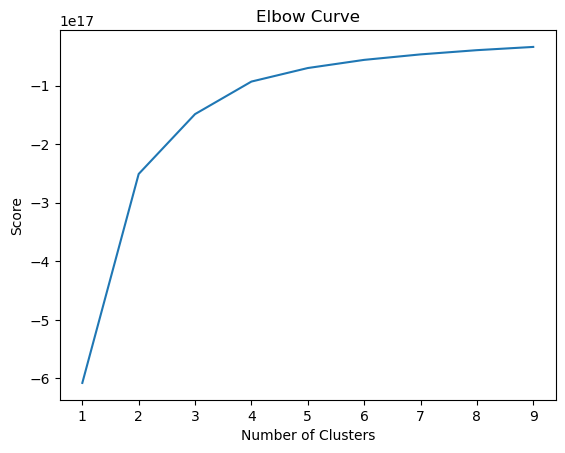

In [47]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

We will use 4 clusters as the data begins to flatten out at 4.

### 3. K-means clustering

In [48]:
#Create the k-means object.
kmeans = KMeans(n_clusters = 4)

In [49]:
#Fit the k-means object to the data.
kmeans.fit(df2)

C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [50]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\marci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marci\AppData\Local\Temp\ipykernel_800\3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [51]:
#view the data to verify the clusters column was added
df2.head()

,weekly_rank,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,clusters
0,1,93200000,1.8333,50800000.0,2,1
1,2,30600000,1.5667,19500000.0,1,2
2,3,5900000,1.6333,3600000.0,1,0
3,4,6000000,1.6667,3600000.0,3,0
4,5,8100000,2.2833,3500000.0,5,0


In [52]:
#view the count breakdown of each cluster created
df2['clusters'].value_counts()

clusters
0    1139
2     356
1      92
3      13
Name: count, dtype: int64

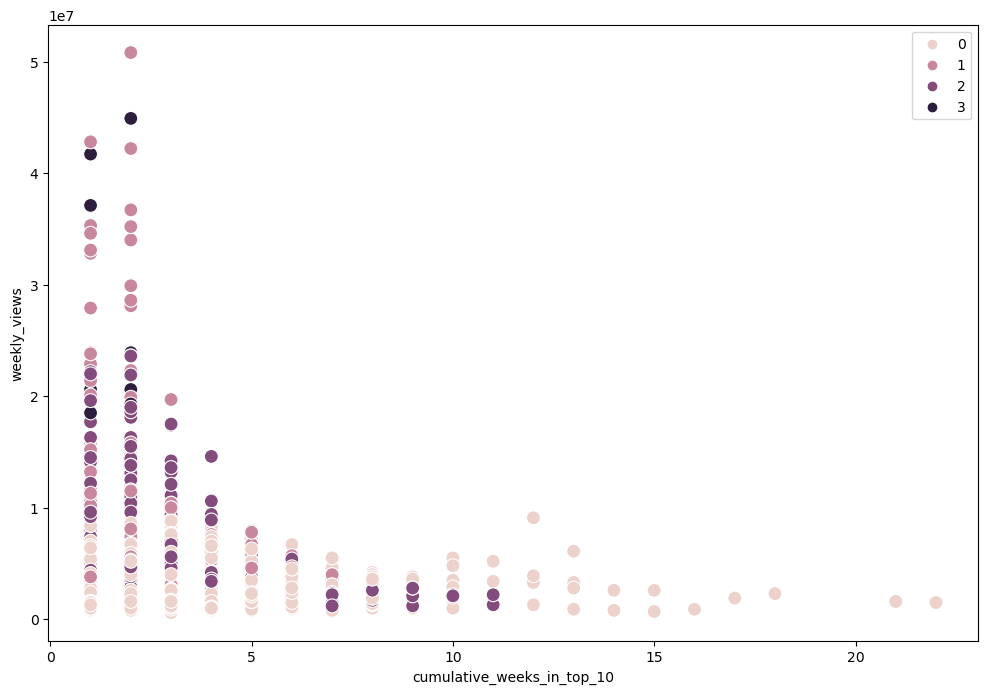

In [53]:
# Plot the clusters for the "cumulative_weeks_in_top_10" and "weekly_views" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['cumulative_weeks_in_top_10'], y=df2['weekly_views'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('cumulative_weeks_in_top_10') 
plt.ylabel('weekly_views')
plt.show()

The scatterplot shows that many of the shows/ movies spend little total time in the top 10, and have a high weekly view rate for only 1-2 weeks. After about 2 weeks in the top 10 the view rate tends to slow. Most shows do not spend more that 3 weeks in the top 10.

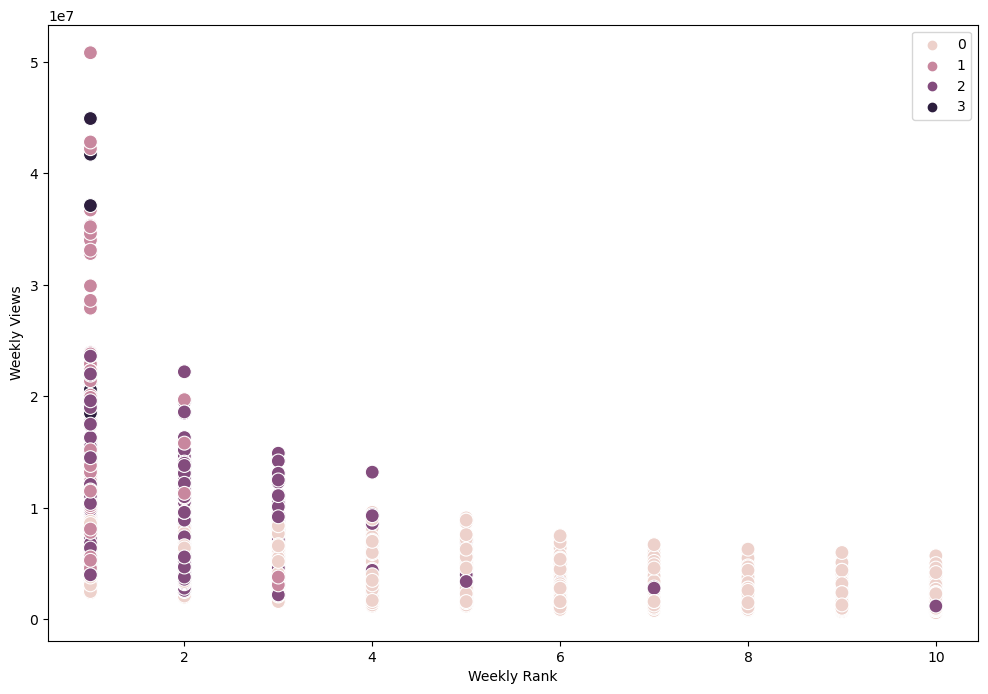

In [54]:
# Plot the clusters for the "weekly_rank" and "weekly_views" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['weekly_rank'], y=df2['weekly_views'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Weekly Rank') 
plt.ylabel('Weekly Views')
plt.show()

As the weekly views increase so does the weekly rank. 1 is the highest rank.

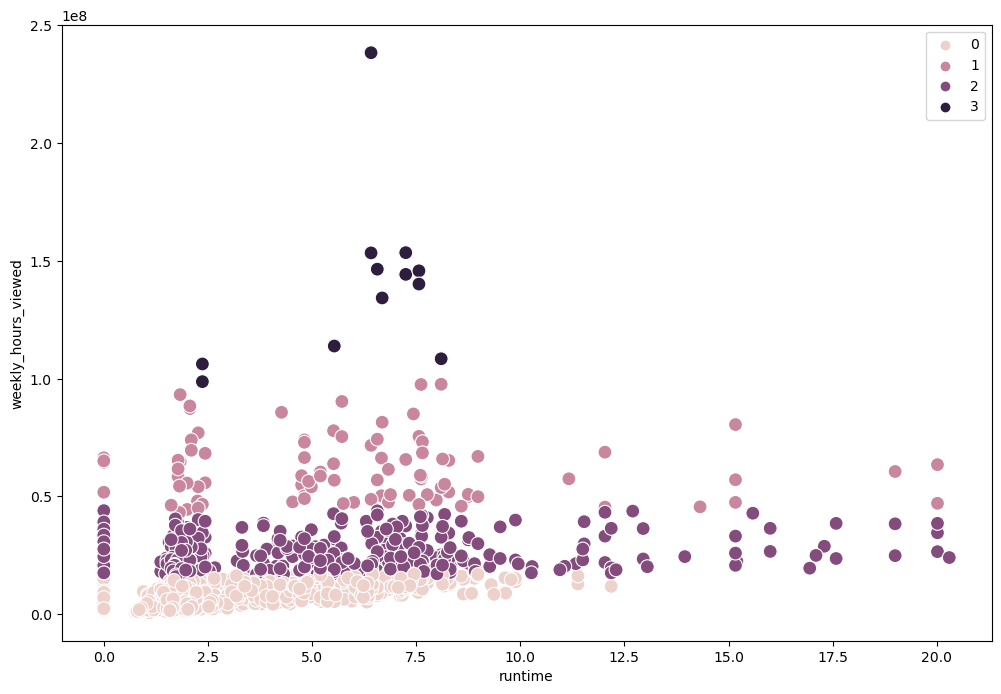

In [55]:
# Plot the clusters for the "runtime" and "weekly_hours_viewed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['runtime'], y=df2['weekly_hours_viewed'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('runtime') 
plt.ylabel('weekly_hours_viewed')
plt.show()

This scatterplot shows us that even though the runtime increases the weekly hours a program is viewed does not necessarily increase aswell. This could mean the show is not as long so it doen't accumulate as many hours viewed, or the program is being viewed overtime and not as much in the span of one week. 
Cluster 0 has the lowest weekly views but the runtime is still comparable to the other clusters. Cluster 3 has the most programs with a moderate amount of weekly hours viewd and the longest runtime.

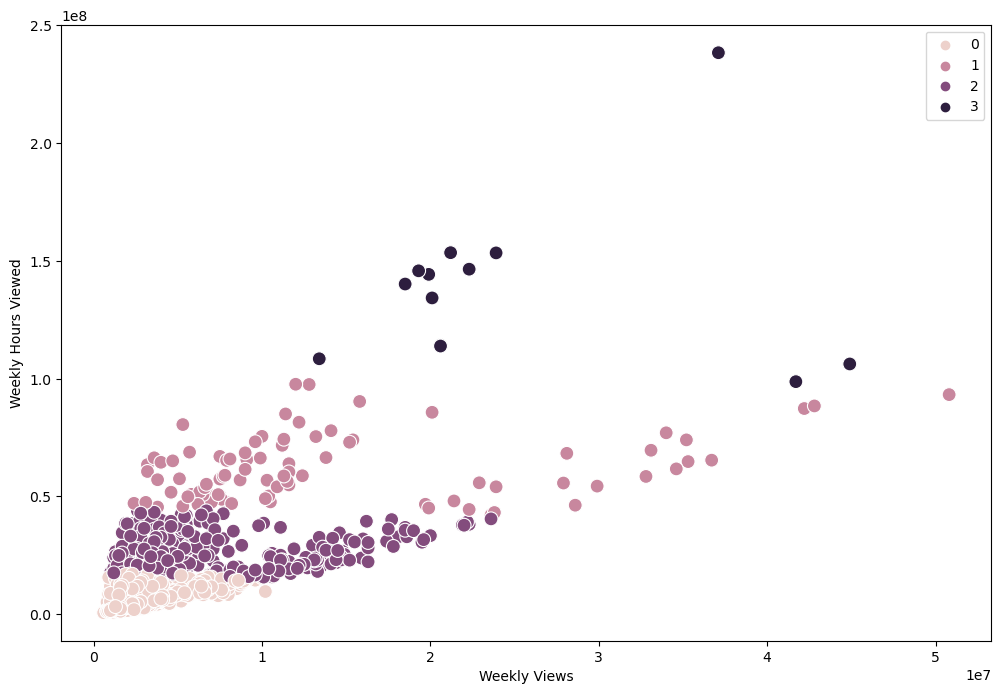

In [56]:
# Plot the clusters for the "weekly_views" and "weekly_hours_viewed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['weekly_views'], y=df2['weekly_hours_viewed'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Weekly Views') 
plt.ylabel('Weekly Hours Viewed')
plt.show()

As the weekly views increase so does the number of hours a program is viewed. However, the runtime for each program varies so this correlation varies depending on how long the program is.

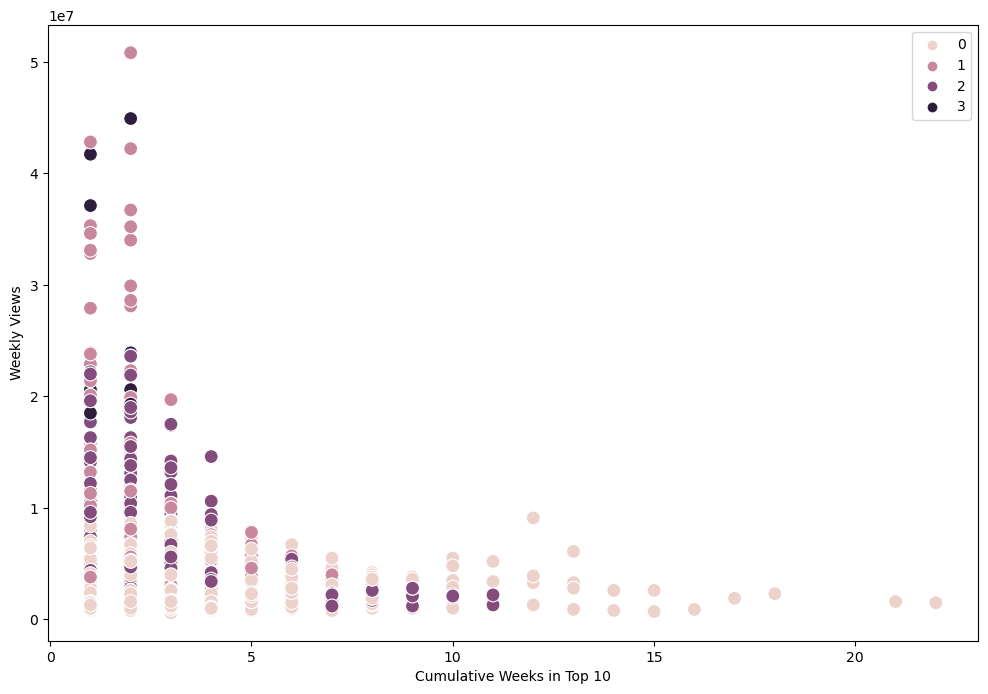

In [57]:
# Plot the clusters for the "cumulative_weeks_in_top_10" and "weekly_views" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['cumulative_weeks_in_top_10'], y=df2['weekly_views'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Cumulative Weeks in Top 10') 
plt.ylabel('Weekly Views')
plt.show()

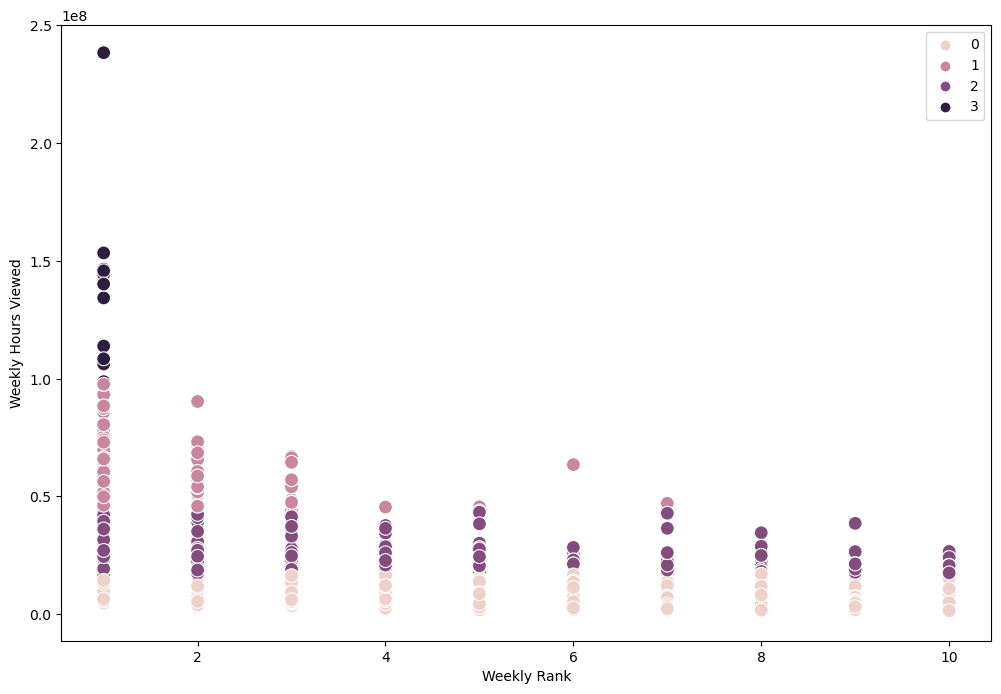

In [58]:
# Plot the clusters for the "weekly_hours_viewed" and "cumulative_weeks_in_top_10" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['weekly_rank'], y=df2['weekly_hours_viewed'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Weekly Rank') 
plt.ylabel('Weekly Hours Viewed')
plt.show()

In [59]:
df2.loc[df2['clusters'] == 3, 'cluster'] = 'light pink'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\marci\AppData\Local\Temp\ipykernel_800\1014563812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['clusters'] == 3, 'cluster'] = 'light pink'


In [60]:
df2.groupby('cluster').agg({'runtime':['mean', 'median'],
'cumulative_weeks_in_top_10':['mean', 'median'],
'weekly_views':['mean', 'median'],
'weekly_hours_viewed':['mean', 'median']})

runtime          cumulative_weeks_in_top_10         \
                 mean   median                       mean median   
cluster                                                            
dark purple  5.397988  4.98330                   2.971910    2.0   
light pink   6.124369  6.56670                   1.615385    2.0   
pink         2.827011  1.93330                   2.667252    2.0   
purple       6.253265  6.20835                   2.380435    2.0   

             weekly_views             weekly_hours_viewed               
                     mean      median                mean       median  
cluster                                                                 
dark purple  6.472472e+06   4400000.0        2.568399e+07   23800000.0  
light pink   2.488462e+07  20600000.0        1.382077e+08  140100000.0  
pink         2.968393e+06   2400000.0        7.495786e+06    6900000.0  
purple       1.375326e+07  10100000.0        6.115326e+07   58200000.0

The findings show the dark purple cluster has the most weekly views, weekly hours viewed, and cumulative weeks in the top 10. The light pink cluster has the highest runtime. This would be beneficial down the road to continue to monitor the different clusters and how they behave over time. We can see how long shows typically stay in the top 10 and how the weekly hours viewd changes witht he runtime.